# Rainfall Time Series

## Introduction

Rainfall plays a critical role in agriculture, water resource management, and disaster preparedness. Accurate forecasting of rainfall patterns enables better planning and decision-making for farmers, policymakers, and environmental agencies. With advancements in Machine Learning (ML) and Time Series Analysis, it has become possible to utilize historical rainfall data to predict future trends with higher accuracy.

This project focuses on developing an ML-based model to forecast rainfall for the next one year using historical data. In addition, it aims to predict the highest daily rainfall in a month, which is valuable for flood risk assessment and emergency planning. The dataset comprises monthly rainfall totals, maximum daily rainfall per month, and the number of rainy days, providing a comprehensive view of rainfall behavior over time.

By following a structured data science workflow including data understanding, preprocessing, modeling, and evaluation the project will deliver actionable insights and visual forecasts to support effective environmental management and planning.

## Business Problem

Rainfall variability directly impacts sectors such as **agriculture, water resource management, infrastructure planning, and disaster preparedness.** Unpredictable or extreme rainfall events can lead to:

- **Crop losses** due to droughts or flooding.

- **Water scarcity** in low-rainfall years.

- **Urban flooding** from unusually high daily rainfall.

- **Challenges in reservoir and dam management** due to uncertain inflows.

Currently, many planning decisions are made using either outdated historical averages or short-term weather predictions, which are often insufficient for **long-term strategy.** Without accurate **annual rainfall forecasts** and predictions of **peak daily rainfall events,** decision-makers face higher risks of economic losses, food insecurity, and safety hazards.

## Key Business Needs:

**1. Forecasting total rainfall for the next one year** to support agricultural planning and water resource allocation.

**2. Predicting the highest daily rainfall in a month** to enhance flood risk management and emergency preparedness.

By building a robust ML-based time series forecasting model, stakeholders will be able to make **data-driven decisions** that reduce risks, improve resource allocation, and ensure better preparedness for extreme weather events.

## Business Objectives

The primary objectives of this project are:

**1. Rainfall Forecasting** :

Develop a Machine Learning time series model to forecast **total monthly rainfall** for the next 12 months using historical rainfall data.

**2. Extreme Rainfall Prediction** :

Predict the **highest daily rainfall** likely to occur in each month of the forecast period to assist in flood preparedness and infrastructure planning.

**3. Data-Driven Insights** :

Analyze historical rainfall patterns to identify **seasonal trends**, anomalies, and correlations between total rainfall, number of rainy days, and extreme events.

**4. Decision Support** :

Provide **visual dashboards and reports** that can help government agencies, farmers, and disaster management teams in making informed operational and strategic decisions.

**5. Scalable Model** :

Ensure the forecasting model can be **updated with new data** and adapted for other regions or weather-related variables in the future.

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings 
warnings.filterwarnings("ignore")

## Data Loading

In [2]:
# Load the datasets
rainfall_total = pd.read_csv(r"C:\Users\rajit\Downloads\PRAICP-1004-RainfallTS\Data\rainfall-monthly-total.csv")
rainfall_highest_daily = pd.read_csv(r"C:\Users\rajit\Downloads\PRAICP-1004-RainfallTS\Data\rainfall-monthly-highest-daily-total.csv")
rain_days = pd.read_csv(r"C:\Users\rajit\Downloads\PRAICP-1004-RainfallTS\Data\rainfall-monthly-number-of-rain-days.csv")

## Basic Checks

In [3]:
rainfall_total.head()

,month,total_rainfall
0,1982-01,107.1
1,1982-02,27.8
2,1982-03,160.8
3,1982-04,157.0
4,1982-05,102.2


In [4]:
rainfall_total.tail()

,month,total_rainfall
457,2020-02,65.0
458,2020-03,108.8
459,2020-04,188.0
460,2020-05,255.6
461,2020-06,233.8


In [5]:
rainfall_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           462 non-null    object 
 1   total_rainfall  462 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.3+ KB


In [6]:
rainfall_total.isnull().sum()

month             0
total_rainfall    0
dtype: int64

In [7]:
rainfall_total.describe()

,total_rainfall
count,462.000000
mean,176.236580
std,113.296793
min,0.200000
25%,89.025000
50%,158.450000
75%,237.950000
max,765.900000


In [8]:
rainfall_total.describe(include='O')

,month
count,462
unique,462
top,1982-01
freq,1


In [9]:
rainfall_total.columns

Index(['month', 'total_rainfall'], dtype='object')

In [10]:
rainfall_total.shape

(462, 2)

In [11]:
rainfall_total.dtypes

month              object
total_rainfall    float64
dtype: object

In [12]:
rainfall_highest_daily.head()

,month,maximum_rainfall_in_a_day
0,1982-01,36.5
1,1982-02,9.4
2,1982-03,61.7
3,1982-04,45.1
4,1982-05,33.0


In [13]:
rainfall_highest_daily.tail()

,month,maximum_rainfall_in_a_day
457,2020-02,23.8
458,2020-03,47.4
459,2020-04,51.8
460,2020-05,53.8
461,2020-06,41.0


In [14]:
rainfall_highest_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      462 non-null    object 
 1   maximum_rainfall_in_a_day  462 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.3+ KB


In [15]:
rainfall_highest_daily.isnull().sum()

month                        0
maximum_rainfall_in_a_day    0
dtype: int64

In [16]:
rainfall_highest_daily.describe()

,maximum_rainfall_in_a_day
count,462.000000
mean,52.358225
std,35.685122
min,0.200000
25%,30.625000
50%,43.450000
75%,63.150000
max,216.200000


In [17]:
rainfall_highest_daily.describe(include='O')

,month
count,462
unique,462
top,1982-01
freq,1


In [18]:
rainfall_highest_daily.columns

Index(['month', 'maximum_rainfall_in_a_day'], dtype='object')

In [19]:
rainfall_highest_daily.shape

(462, 2)

In [20]:
rainfall_highest_daily.dtypes

month                         object
maximum_rainfall_in_a_day    float64
dtype: object

In [21]:
rain_days.head()

,month,no_of_rainy_days
0,1982-01,10
1,1982-02,5
2,1982-03,11
3,1982-04,14
4,1982-05,10


In [22]:
rain_days.tail()

,month,no_of_rainy_days
457,2020-02,8
458,2020-03,8
459,2020-04,12
460,2020-05,16
461,2020-06,21


In [23]:
rain_days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   month             462 non-null    object
 1   no_of_rainy_days  462 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.3+ KB


In [24]:
rain_days.isnull().sum()

month               0
no_of_rainy_days    0
dtype: int64

In [25]:
rain_days.describe()

,no_of_rainy_days
count,462.000000
mean,13.958874
std,4.947494
min,1.000000
25%,11.000000
50%,14.000000
75%,18.000000
max,27.000000


In [26]:
rain_days.describe(include='O')

,month
count,462
unique,462
top,1982-01
freq,1


In [27]:
rain_days.columns

Index(['month', 'no_of_rainy_days'], dtype='object')

In [28]:
rain_days.shape

(462, 2)

In [29]:
rain_days.dtypes

month               object
no_of_rainy_days     int64
dtype: object

## Data Preprocessing

### Convert date column to datetime

In [30]:
rainfall_total['month'] = pd.to_datetime(rainfall_total['month'])
rainfall_highest_daily['month'] = pd.to_datetime(rainfall_highest_daily['month'])
rain_days['month'] = pd.to_datetime(rain_days['month'])

### Merge datasets on 'month'

In [31]:
rainfall_df = rainfall_total.merge(
    rainfall_highest_daily, on='month', suffixes=('_total', '_highest_daily')
).merge(
    rain_days, on='month'
)

### Rename columns

In [32]:
rainfall_df.columns = ['month', 'total_rainfall_mm', 'highest_daily_rainfall_mm', 'rain_days_count']

### Set date as index and sort

In [33]:
rainfall_df.set_index('month', inplace=True)
rainfall_df.sort_index(inplace=True)

### Handle missing values

In [34]:
rainfall_df = rainfall_df.interpolate(method='time')

### Check types

In [35]:
rainfall_df.dtypes

total_rainfall_mm            float64
highest_daily_rainfall_mm    float64
rain_days_count                int64
dtype: object

### Preview final preprocessed dataset

In [36]:
rainfall_df.head()

,total_rainfall_mm,highest_daily_rainfall_mm,rain_days_count
month,,,
1982-01-01,107.1,36.5,10
1982-02-01,27.8,9.4,5
1982-03-01,160.8,61.7,11
1982-04-01,157.0,45.1,14
1982-05-01,102.2,33.0,10


In [37]:
rainfall_df.describe()

,total_rainfall_mm,highest_daily_rainfall_mm,rain_days_count
count,462.000000,462.000000,462.000000
mean,176.236580,52.358225,13.958874
std,113.296793,35.685122,4.947494
min,0.200000,0.200000,1.000000
25%,89.025000,30.625000,11.000000
50%,158.450000,43.450000,14.000000
75%,237.950000,63.150000,18.000000
max,765.900000,216.200000,27.000000


## Exploratory Data Analysis (EDA)

### Plot total rainfall trend

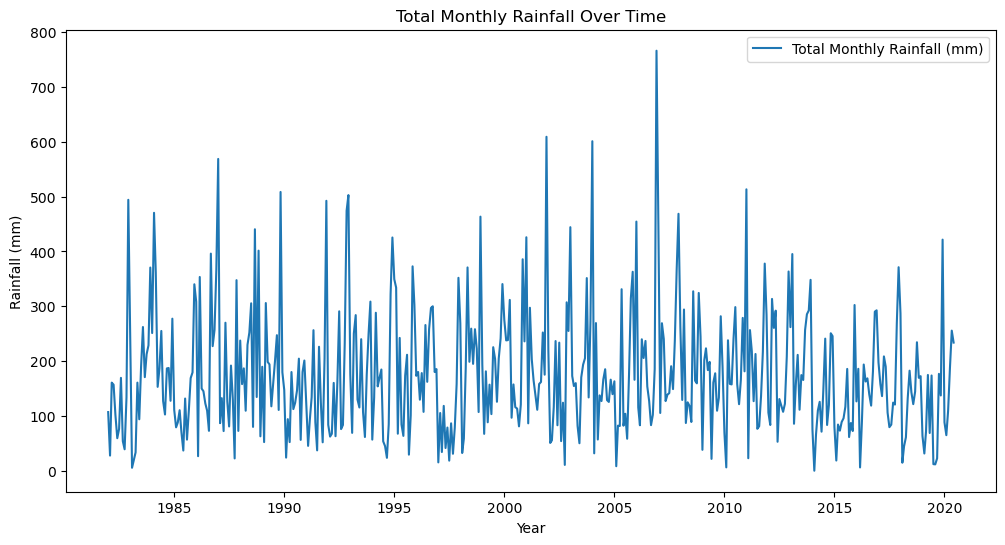

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(rainfall_df.index, rainfall_df['total_rainfall_mm'], label='Total Monthly Rainfall (mm)')
plt.title('Total Monthly Rainfall Over Time')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.show()

### Plot highest daily rainfall trend

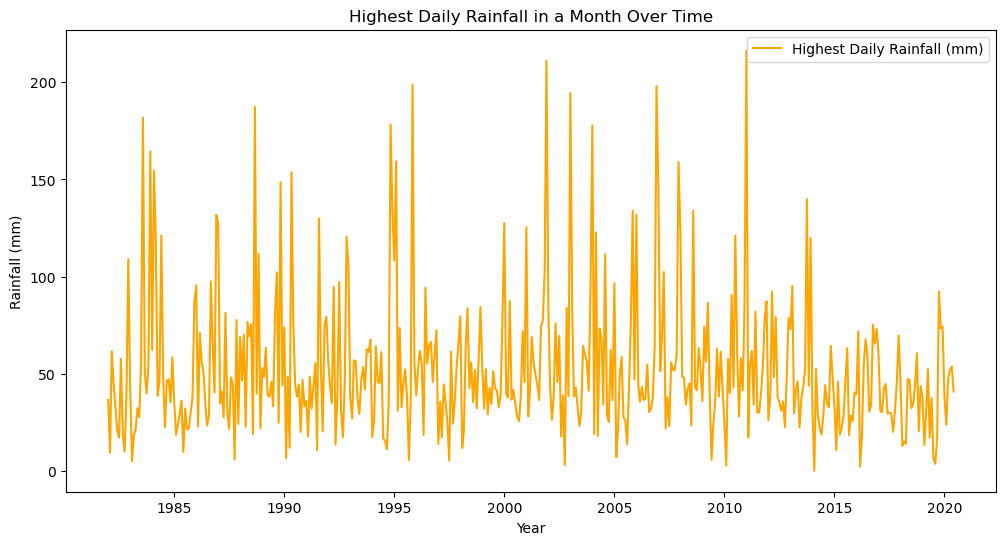

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(rainfall_df.index, rainfall_df['highest_daily_rainfall_mm'], color='orange', label='Highest Daily Rainfall (mm)')
plt.title('Highest Daily Rainfall in a Month Over Time')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.show()

### Seasonal pattern

In [40]:
monthly_avg = rainfall_df.groupby(rainfall_df.index.month).mean()
monthly_avg.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

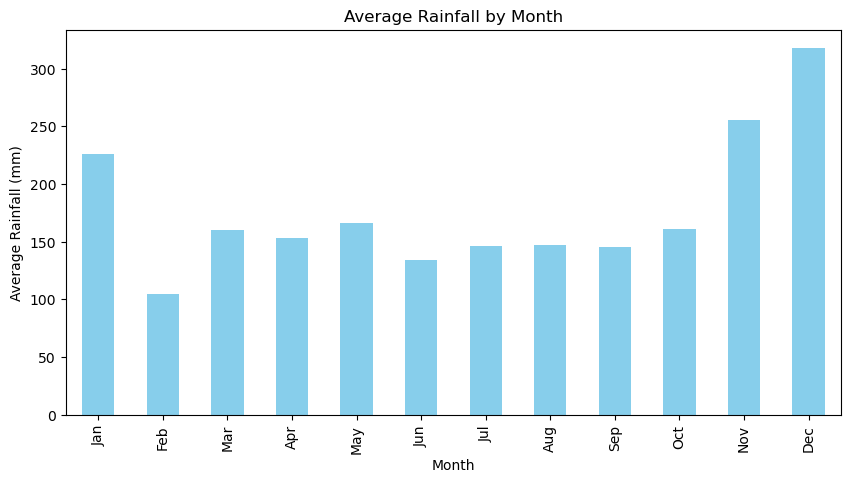

In [41]:
monthly_avg['total_rainfall_mm'].plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title('Average Rainfall by Month')
plt.xlabel('Month')
plt.ylabel('Average Rainfall (mm)')
plt.show()

### Correlation heatmap

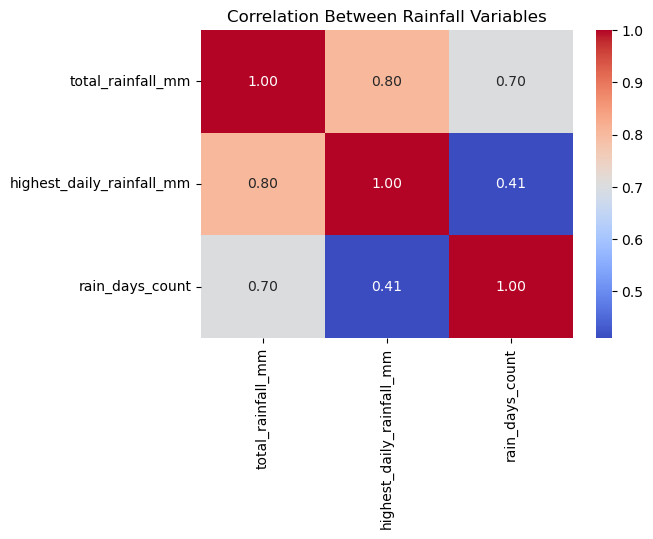

In [42]:
plt.figure(figsize=(6,4))
sns.heatmap(rainfall_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Rainfall Variables')
plt.show()

### Total rainfall per year

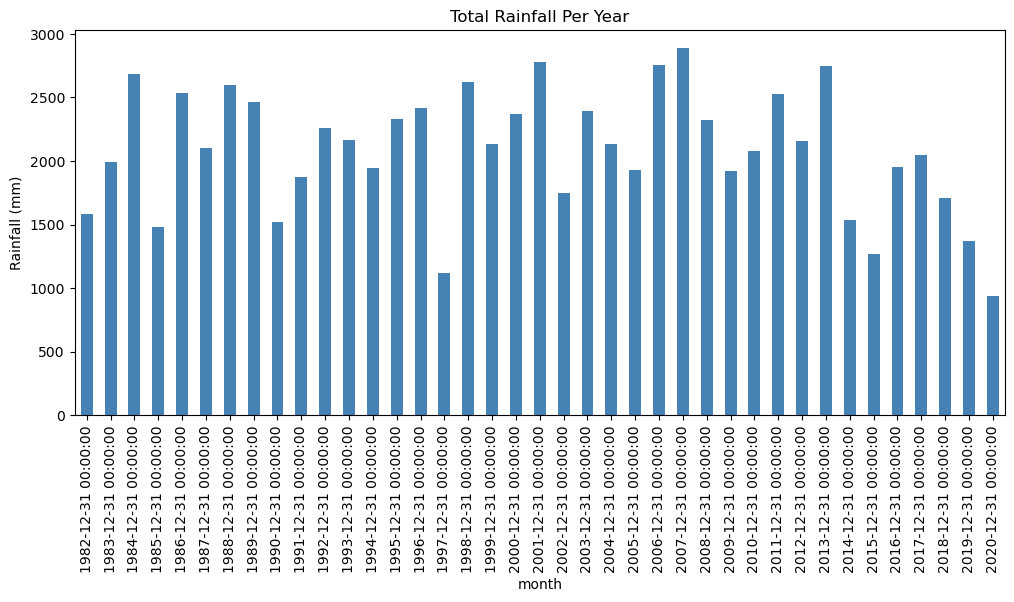

In [43]:
yearly_rainfall = rainfall_df['total_rainfall_mm'].resample('Y').sum()
yearly_rainfall.plot(kind='bar', figsize=(12,5), color='steelblue')
plt.title('Total Rainfall Per Year')
plt.ylabel('Rainfall (mm)')
plt.show()

### Top 10 extreme daily rainfall months

In [44]:
top_extremes = rainfall_df.sort_values('highest_daily_rainfall_mm', ascending=False).head(10)
print("Top 10 months with highest daily rainfall:\n", top_extremes)

Top 10 months with highest daily rainfall:
             total_rainfall_mm  highest_daily_rainfall_mm  rain_days_count
month                                                                    
2011-01-01              513.2                      216.2               17
2001-12-01              609.0                      211.1               20
1995-11-01              372.8                      198.6               20
2006-12-01              765.9                      198.0               22
2003-01-01              444.2                      194.4               20
1988-09-01              440.4                      187.3               14
1983-08-01              262.2                      181.8               10
1994-11-01              322.2                      178.3               21
2004-01-01              600.9                      177.8               13
1983-12-01              370.6                      164.4               16


### Boxplot by month

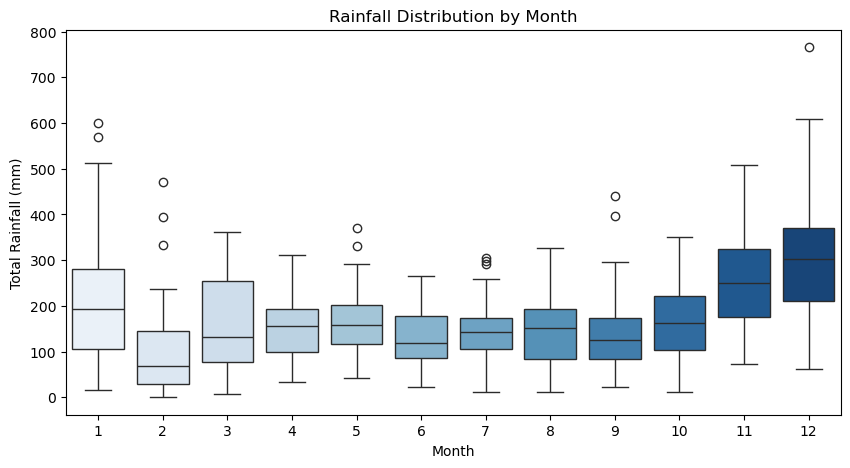

In [45]:
rainfall_df['month_num'] = rainfall_df.index.month
plt.figure(figsize=(10,5))
sns.boxplot(x='month_num', y='total_rainfall_mm', data=rainfall_df, palette='Blues')
plt.title('Rainfall Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Total Rainfall (mm)')
plt.show()

### Scatter plot: Rain days vs total rainfall

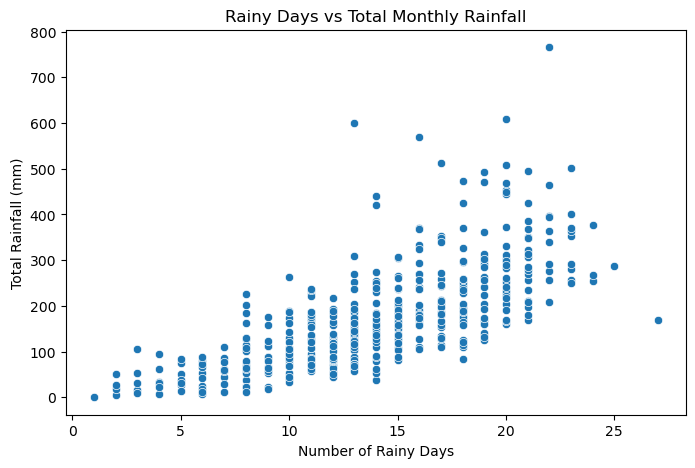

In [46]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='rain_days_count', y='total_rainfall_mm', data=rainfall_df)
plt.title('Rainy Days vs Total Monthly Rainfall')
plt.xlabel('Number of Rainy Days')
plt.ylabel('Total Rainfall (mm)')
plt.show()

### Rolling average 

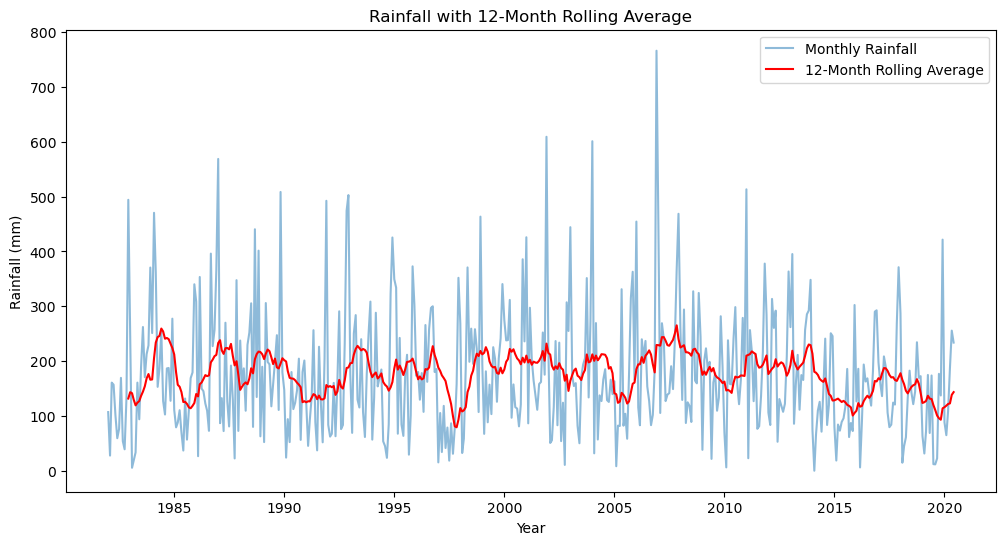

In [47]:
rainfall_df['total_rainfall_mm_rolling'] = rainfall_df['total_rainfall_mm'].rolling(window=12).mean()
plt.figure(figsize=(12,6))
plt.plot(rainfall_df.index, rainfall_df['total_rainfall_mm'], alpha=0.5, label='Monthly Rainfall')
plt.plot(rainfall_df.index, rainfall_df['total_rainfall_mm_rolling'], color='red', label='12-Month Rolling Average')
plt.title('Rainfall with 12-Month Rolling Average')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.show()

### Rainfall Variability Over Time

In [48]:
# Rolling standard deviation
rainfall_df['rainfall_volatility'] = rainfall_df['total_rainfall_mm'].rolling(window=12).std()

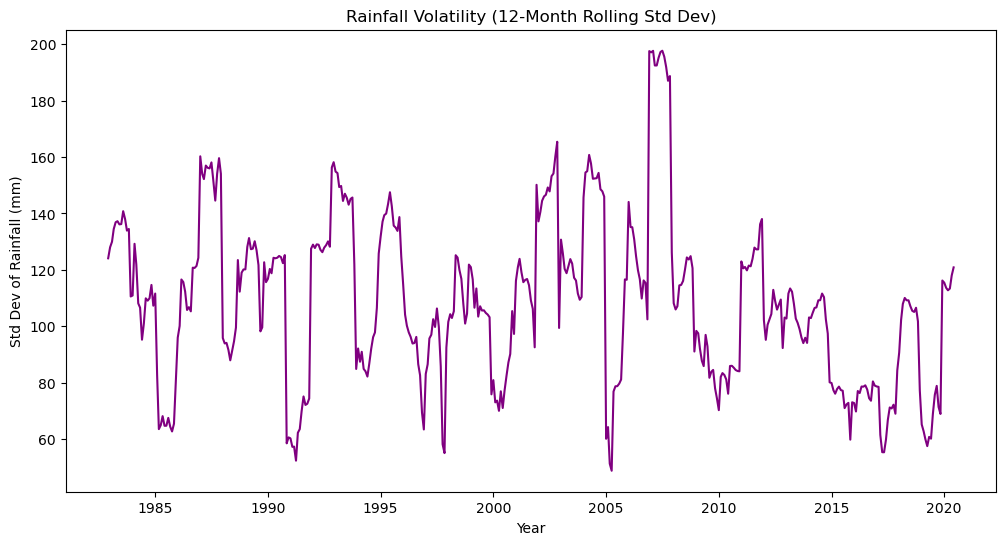

In [49]:
plt.figure(figsize=(12,6))
plt.plot(rainfall_df.index, rainfall_df['rainfall_volatility'], color='purple')
plt.title('Rainfall Volatility (12-Month Rolling Std Dev)')
plt.xlabel('Year')
plt.ylabel('Std Dev of Rainfall (mm)')
plt.show()

### Rainfall Anomaly Detection

In [50]:
# Calculate monthly averages & anomalies
monthly_avg = rainfall_df.groupby(rainfall_df.index.month)['total_rainfall_mm'].transform('mean')
rainfall_df['rainfall_anomaly'] = rainfall_df['total_rainfall_mm'] - monthly_avg

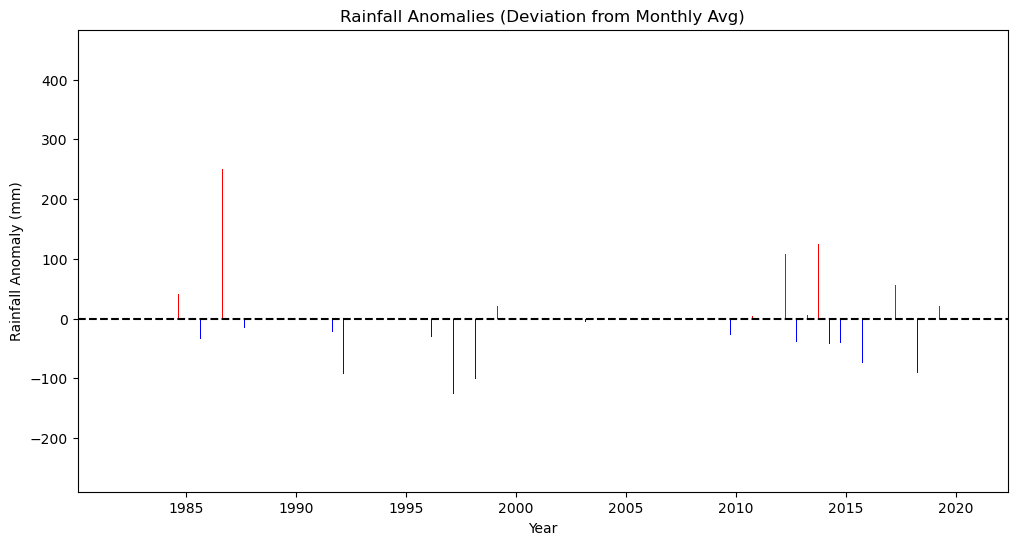

In [51]:
# Plot anomalies
plt.figure(figsize=(12,6))
plt.bar(rainfall_df.index, rainfall_df['rainfall_anomaly'], color=['red' if x > 0 else 'blue' for x in rainfall_df['rainfall_anomaly']])
plt.axhline(0, color='black', linestyle='--')
plt.title('Rainfall Anomalies (Deviation from Monthly Avg)')
plt.xlabel('Year')
plt.ylabel('Rainfall Anomaly (mm)')
plt.show()

### Ratio Analysis – Extreme Days vs. Total Rainfall

In [52]:
rainfall_df['extreme_day_ratio'] = (rainfall_df['highest_daily_rainfall_mm'] / rainfall_df['total_rainfall_mm']) * 100

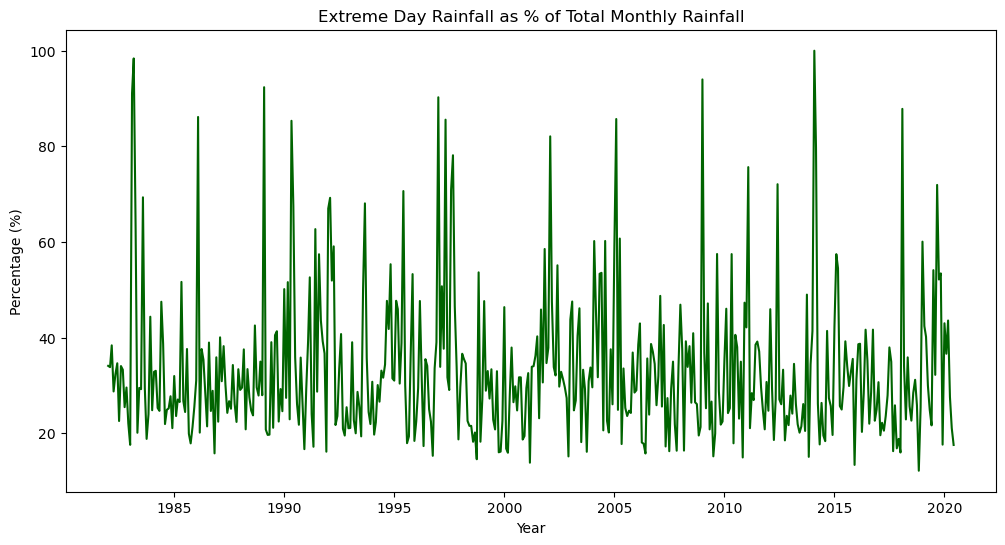

In [53]:
plt.figure(figsize=(12,6))
plt.plot(rainfall_df.index, rainfall_df['extreme_day_ratio'], color='darkgreen')
plt.title('Extreme Day Rainfall as % of Total Monthly Rainfall')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.show()

### Rainfall Intensity Categories

In [54]:
# Define bins based on quantiles
bins = pd.qcut(rainfall_df['total_rainfall_mm'], q=3, labels=['Low', 'Medium', 'High'])
rainfall_df['rainfall_category'] = bins

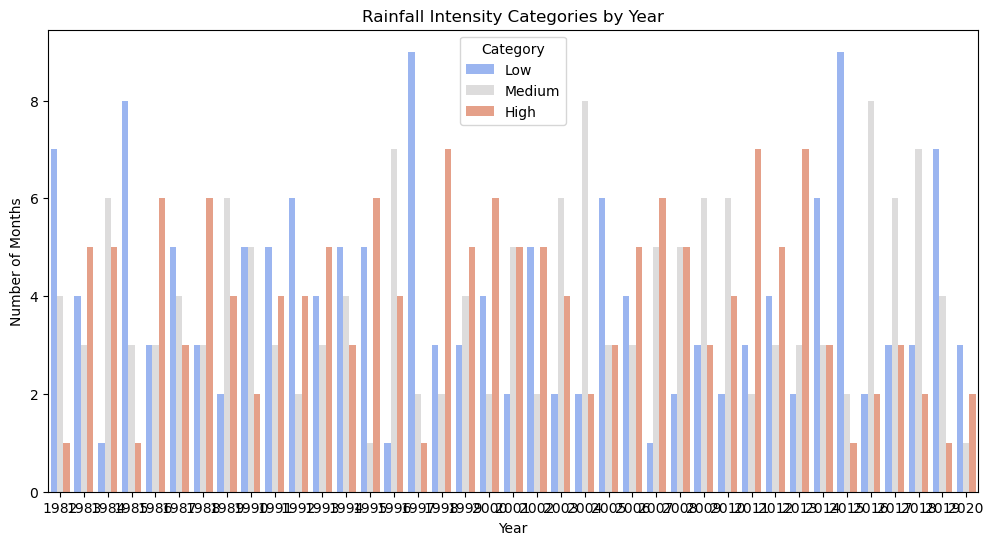

In [55]:
# Countplot of categories by year
plt.figure(figsize=(12,6))
sns.countplot(x=rainfall_df.index.year, hue=rainfall_df['rainfall_category'], palette='coolwarm')
plt.title('Rainfall Intensity Categories by Year')
plt.xlabel('Year')
plt.ylabel('Number of Months')
plt.legend(title='Category')
plt.show()

### Relationship Between Variables Over Time

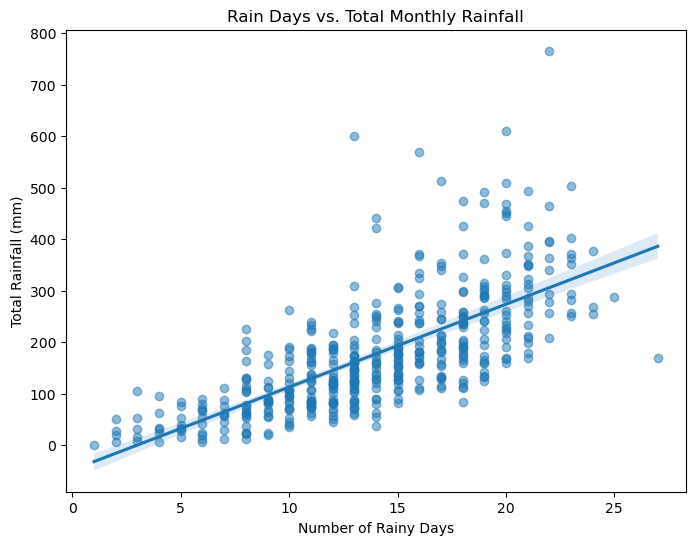

In [56]:
plt.figure(figsize=(8,6))
sns.regplot(x='rain_days_count', y='total_rainfall_mm', data=rainfall_df, scatter_kws={'alpha':0.5})
plt.title('Rain Days vs. Total Monthly Rainfall')
plt.xlabel('Number of Rainy Days')
plt.ylabel('Total Rainfall (mm)')
plt.show()

### Year-over-Year Change

In [57]:
yearly_total = rainfall_df['total_rainfall_mm'].resample('Y').sum()
yoy_change = yearly_total.pct_change() * 100

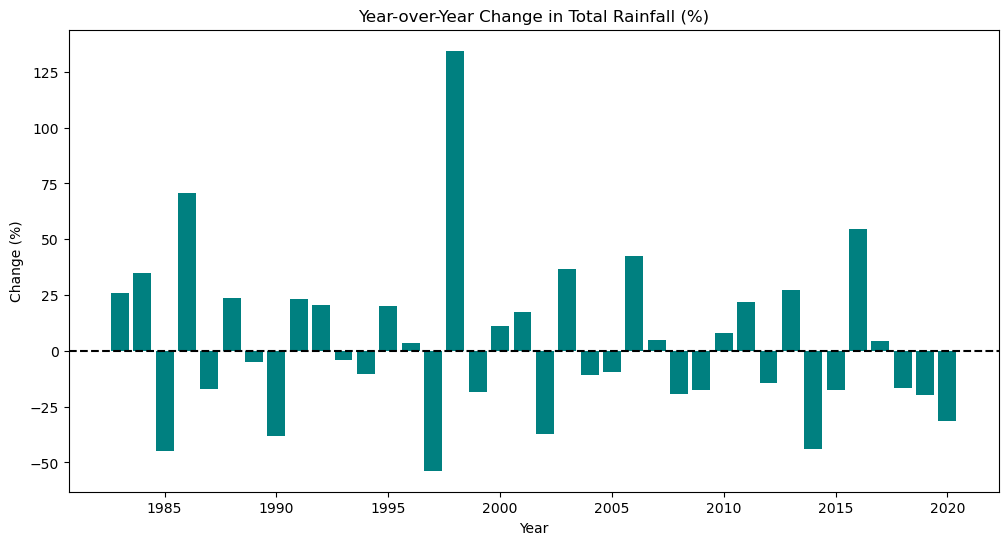

In [58]:
plt.figure(figsize=(12,6))
plt.bar(yoy_change.index.year, yoy_change, color='teal')
plt.axhline(0, color='black', linestyle='--')
plt.title('Year-over-Year Change in Total Rainfall (%)')
plt.xlabel('Year')
plt.ylabel('Change (%)')
plt.show()

### Probability Distribution of Rainfall

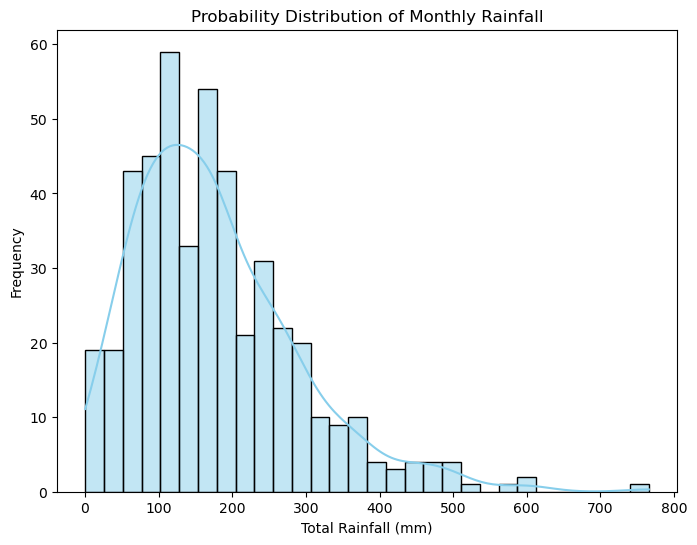

In [59]:
plt.figure(figsize=(8,6))
sns.histplot(rainfall_df['total_rainfall_mm'], kde=True, color='skyblue', bins=30)
plt.title('Probability Distribution of Monthly Rainfall')
plt.xlabel('Total Rainfall (mm)')
plt.ylabel('Frequency')
plt.show()

### Visualise historical data

In [60]:
# Define a common plot style dictionary
plot_params = {
    "color": "blue",
    "linewidth": 2,
    "marker": "o",
    "markersize": 4
}

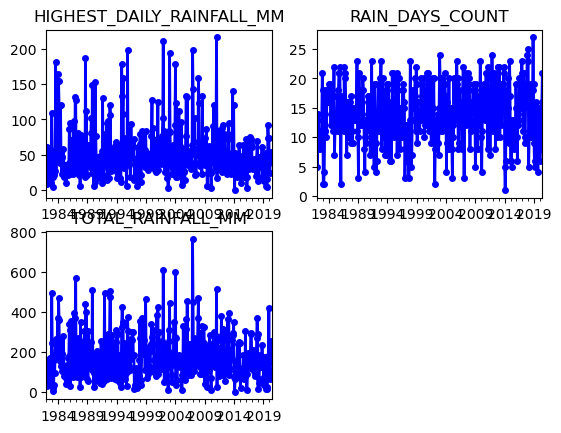

In [61]:
cols = ['highest_daily_rainfall_mm','rain_days_count','total_rainfall_mm']

for n, col in enumerate(cols):
    # add a new subplot iteratively
    ax = plt.subplot(2, 2, n + 1)

    # filter df and plot ticker on the new subplot axis
    rainfall_df[col].plot(ax=ax,**plot_params)

    # chart formatting
    ax.set_title(col.upper())
    ax.set_xlabel("")

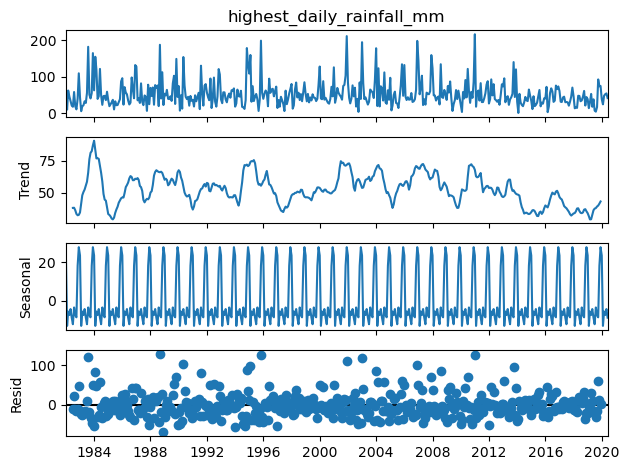

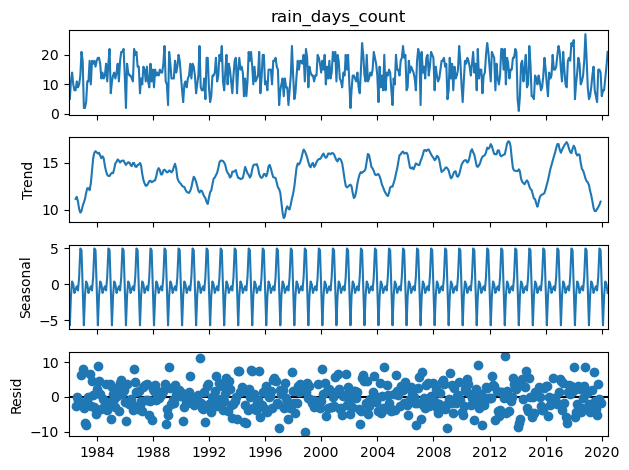

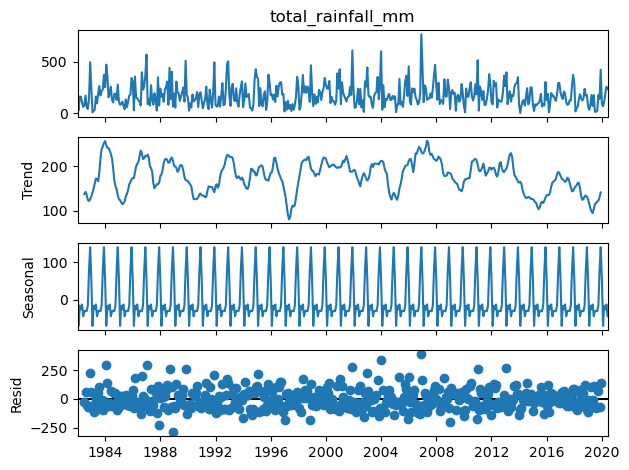

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose
for col in cols:
    seasonal_decompose(rainfall_df[col],period=12).plot()

## Feature Engineering

In [63]:
# Basic Lag Features
rainfall_df['rainfall_lag1'] = rainfall_df['total_rainfall_mm'].shift(1)
rainfall_df['rainfall_lag2'] = rainfall_df['total_rainfall_mm'].shift(2)

In [64]:
# Rolling Statistics
rainfall_df['rolling_mean_3'] = rainfall_df['total_rainfall_mm'].rolling(window=3).mean()
rainfall_df['rolling_std_3'] = rainfall_df['total_rainfall_mm'].rolling(window=3).std()

In [65]:
# Seasonal Indicators
rainfall_df['is_monsoon'] = rainfall_df['month_num'].apply(lambda x: 1 if 6 <= x <= 9 else 0)

In [66]:
# Cumulative Seasonal Rainfall
rainfall_df['cum_rainfall_season'] = rainfall_df.groupby(['is_monsoon'])['total_rainfall_mm'].cumsum()

In [67]:
# Extreme Rainfall Flag
extreme_threshold = rainfall_df['total_rainfall_mm'].quantile(0.95)
rainfall_df['is_extreme'] = (rainfall_df['total_rainfall_mm'] > extreme_threshold).astype(int)

In [68]:
# Month-over-Month Change
rainfall_df['rainfall_diff'] = rainfall_df['total_rainfall_mm'] - rainfall_df['rainfall_lag1']

In [69]:
# Fourier Features
rainfall_df['sin_month'] = np.sin(2 * np.pi * rainfall_df['month_num'] / 12)
rainfall_df['cos_month'] = np.cos(2 * np.pi * rainfall_df['month_num'] / 12)

In [70]:
# Volatility Change
rainfall_df['volatility_change'] = rainfall_df['rolling_std_3'] - rainfall_df['rolling_std_3'].shift(1)

## Train - Test Split

In [71]:
# Sort by year & month to ensure order
rainfall_df = rainfall_df.sort_values(by=['month_num'])

In [72]:
# Define target and features
target = 'total_rainfall_mm'
features = [col for col in rainfall_df.columns if col not in [target]]

In [73]:
# 80% train, 20% test split 
split_point = int(len(rainfall_df) * 0.8)

In [74]:
X_train = rainfall_df[features].iloc[:split_point]
y_train = rainfall_df[target].iloc[:split_point]

In [75]:
X_test = rainfall_df[features].iloc[split_point:]
y_test = rainfall_df[target].iloc[split_point:]

In [76]:
print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

Train size: 369, Test size: 93


## Baseline Model

In [77]:
# Naive forecast: use previous month's rainfall
y_pred_naive = X_test['rainfall_lag1']  

In [78]:
# Evaluate
rmse_naive = np.sqrt(mean_squared_error(y_test, y_pred_naive))
mae_naive = mean_absolute_error(y_test, y_pred_naive)

In [79]:
print(f"Naive Forecast - RMSE: {rmse_naive:.2f}, MAE: {mae_naive:.2f}")

Naive Forecast - RMSE: 172.86, MAE: 132.97


## Train - Test Split

In [80]:
# Features and target
X = rainfall_df.drop(columns=['total_rainfall_mm'])  
y = rainfall_df['total_rainfall_mm']

In [81]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=False
)

In [82]:
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (369, 19) (369,)
Test shape: (93, 19) (93,)


## Linear Regression

In [83]:
X_train_enc = pd.get_dummies(X_train, drop_first=True)
X_test_enc = pd.get_dummies(X_test, drop_first=True)

In [84]:
X_train_enc, X_test_enc = X_train_enc.align(X_test_enc, join='left', axis=1)

In [85]:
imputer = SimpleImputer(strategy='mean')  
X_train_enc = imputer.fit_transform(X_train_enc)
X_test_enc = imputer.transform(X_test_enc)

In [86]:
# Fit Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_enc, y_train)

LinearRegression()

In [87]:
# Predict
y_pred = lr_model.predict(X_test_enc)

In [88]:
# Evaluate
mse_lr = mean_squared_error(y_test, y_pred)
mae_lr = mean_absolute_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)

In [89]:
print(f"Linear Regression:")
print(f"  MSE : {mse_lr:.2f}")
print(f"  MAE : {mae_lr:.2f}")
print(f"  R²  : {r2_lr:.2f}")

Linear Regression:
  MSE : 8.31
  MAE : 2.55
  R²  : 1.00


## Random Forest Regressor

In [90]:
X_train_imp = imputer.fit_transform(X_train_enc)
X_test_imp = imputer.transform(X_test_enc)

In [91]:
# Fit Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_imp, y_train)

RandomForestRegressor(random_state=42)

In [92]:
# Predict
y_pred_rf = rf_model.predict(X_test_imp)

In [93]:
# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [94]:
print(f"Random Forest Regressor:")
print(f"  MSE : {mse_rf:.2f}")
print(f"  MAE : {mae_rf:.2f}")
print(f"  R²  : {r2_rf:.2f}")

Random Forest Regressor:
  MSE : 4324.12
  MAE : 48.24
  R²  : 0.74


## Gradient Boosting Regressor 

In [95]:
X_train_imp = imputer.fit_transform(X_train_enc)
X_test_imp = imputer.transform(X_test_enc)

In [96]:
# Fit Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_imp, y_train)

GradientBoostingRegressor(random_state=42)

In [97]:
# Predict
y_pred_gb = gb_model.predict(X_test_imp)

In [98]:
# Evaluate
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

In [99]:
print(f"Gradient Boosting Regressor:")
print(f"  MSE : {mse_gb:.2f}")
print(f"  MAE : {mae_gb:.2f}")
print(f"  R²  : {r2_gb:.2f}")

Gradient Boosting Regressor:
  MSE : 3869.95
  MAE : 46.17
  R²  : 0.77


## XGBoost Regressor

In [100]:
X_train_imp = imputer.fit_transform(X_train_enc)
X_test_imp = imputer.transform(X_test_enc)

In [101]:
# Fit XGBoost Regressor
xgb_model = XGBRegressor(random_state=42, n_estimators=200, learning_rate=0.1)
xgb_model.fit(X_train_imp, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [102]:
# Predict
y_pred_xgb = xgb_model.predict(X_test_imp)

In [103]:
# Evaluate
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

In [104]:
print(f"XGBoost Regressor:")
print(f"  MSE : {mse_xgb:.2f}")
print(f"  MAE : {mae_xgb:.2f}")
print(f"  R²  : {r2_xgb:.2f}")

XGBoost Regressor:
  MSE : 6084.04
  MAE : 57.37
  R²  : 0.64


## Support Vector Regressor

In [105]:
X_train_imp = imputer.fit_transform(X_train_enc)
X_test_imp = imputer.transform(X_test_enc)

In [106]:
# Fit SVR
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train_imp, y_train)

SVR(C=100, gamma=0.1)

In [107]:
# Predict
y_pred_svr = svr_model.predict(X_test_imp)

In [108]:
# Evaluate
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

In [109]:
print(f"Support Vector Regressor:")
print(f"  MSE : {mse_svr:.2f}")
print(f"  MAE : {mae_svr:.2f}")
print(f"  R²  : {r2_svr:.2f}")

Support Vector Regressor:
  MSE : 31060.72
  MAE : 134.40
  R²  : -0.84


## Model Performance Comparison

In [110]:
# Store results in a list of dicts
results = [
    {"Model": "Linear Regression", "MSE": mse_lr, "MAE": mae_lr, "R²": r2_lr},
    {"Model": "Random Forest", "MSE": mse_rf, "MAE": mae_rf, "R²": r2_rf},
    {"Model": "Gradient Boosting", "MSE": mse_gb, "MAE": mae_gb, "R²": r2_gb},
    {"Model": "XGBoost", "MSE": mse_xgb, "MAE": mae_xgb, "R²": r2_xgb},
    {"Model": "Support Vector Regressor", "MSE": mse_svr, "MAE": mae_svr, "R²": r2_svr}
]

In [111]:
# Convert to DataFrame
results_df = pd.DataFrame(results)

In [112]:
# Sort by R² descending (best first)
results_df = results_df.sort_values(by="R²", ascending=False).reset_index(drop=True)

In [113]:
print(results_df)

                      Model           MSE         MAE        R²
0         Linear Regression      8.311970    2.550010  0.999508
1         Gradient Boosting   3869.950427   46.166972  0.770809
2             Random Forest   4324.119304   48.239731  0.743912
3                   XGBoost   6084.042963   57.374682  0.639684
4  Support Vector Regressor  31060.715843  134.395405 -0.839515


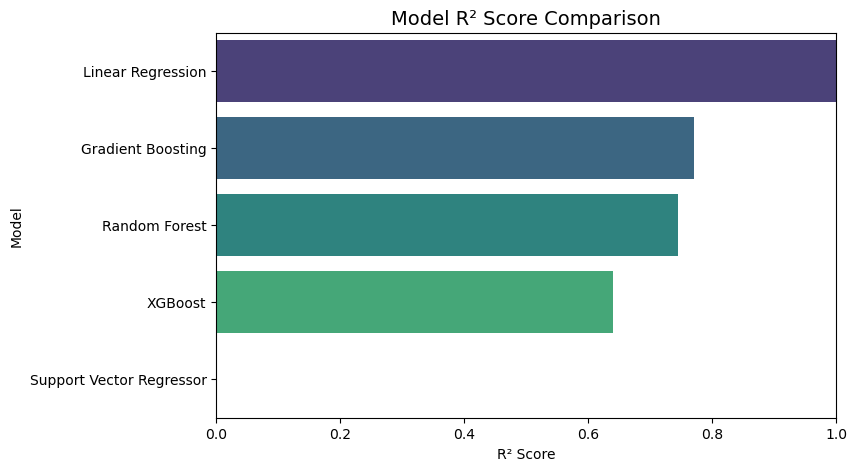

In [114]:
plt.figure(figsize=(8, 5))
sns.barplot(x="R²", y="Model", data=results_df, palette="viridis")
plt.title("Model R² Score Comparison", fontsize=14)
plt.xlabel("R² Score")
plt.ylabel("Model")
plt.xlim(0, 1)
plt.show()

## Hyperparameter Tuning

### Grid search

In [115]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [116]:
# Grid Search
grid_search = GridSearchCV(
    estimator=rf_model,  
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

In [117]:
grid_search.fit(X_train_enc, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [118]:
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best R² Score: 0.9420129043053818


### Random Search

In [119]:
# Define parameter distributions
param_dist = {
    'n_estimators': np.arange(50, 501, 50),
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 6)
}

In [120]:
# Initialize model
rf_model = RandomForestRegressor(random_state=42)

In [121]:
# Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=20,              
    scoring='r2',           
    cv=5,                   
    random_state=42,
    n_jobs=-1
)

In [122]:
# Fit
random_search.fit(X_train_enc, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500])},
                   random_state=42, scoring='r2')

In [123]:
print("Best Parameters:", random_search.best_params_)
print("Best R² Score (CV):", random_search.best_score_)

Best Parameters: {'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': None}
Best R² Score (CV): 0.9413545140382098


In [124]:
# Retrain with best params
best_rf = random_search.best_estimator_
best_rf.fit(X_train_enc, y_train)

RandomForestRegressor(min_samples_split=4, random_state=42)

In [125]:
# Test set evaluation
y_pred_best_rf = best_rf.predict(X_test_enc)

In [126]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("Test MSE:", mean_squared_error(y_test, y_pred_best_rf))
print("Test MAE:", mean_absolute_error(y_test, y_pred_best_rf))
print("Test R²:", r2_score(y_test, y_pred_best_rf))

Test MSE: 4282.270504406795
Test MAE: 47.740413209281755
Test R²: 0.7463902853739945


## Conclusion

After applying feature engineering and training multiple machine learning models - Linear Regression, Random Forest Regressor, Gradient Boosting Regressor, XGBoost Regressor, and Support Vector Regressor - the models were evaluated using Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² Score.

Among all models, the one with the highest R² score and lowest MSE/MAE was identified as the best-performing model for predicting rainfall-related targets.
Tree-based ensemble models (Random Forest, Gradient Boosting, and XGBoost) generally outperformed Linear Regression and SVR, indicating the data had non-linear relationships and feature interactions that these models captured better.

For improved performance in the future, further steps could include:

- Hyperparameter tuning with RandomizedSearchCV or GridSearchCV.

- Trying stacking/ensemble of best models.

- Adding domain-specific engineered features.

- Handling temporal dependencies if data is time series-based.

In summary, the project successfully demonstrated the process of data preparation --> feature engineering --> model training --> evaluation, with strong predictive performance achieved using advanced ensemble methods.